In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:


df = pd.read_csv("akinator.csv")
pd.set_option("display.max.columns", None)
df.head()


,Prenom,Nom,github name,Anniversaire,email,Animal totem,Thé ou Café,Fumeur,Couleur,H / F,Plat préféré,Signe astrologique,Gaming ?,Echecs,Allergies ?,Mac ou PC,Des enfants?,Transport ?,Tatouage?,Entreprise?,Sucré ou salé?,Preference manuelle,Jour ou Nuit,Artiste musical préféré,Traduction artiste,"Mon ""Martine"" préféré",série préférée,Sport pratiqué,sur une île déserte. j'emmène..,Film préféré,Année de naissance,note du BAC en maths,Taille (cm),Taille de pied
0,Jonathan,Serafini,Joz84,16/05/1984,NaN,Elephant,Thé,non,bleu,h,sashimi,taureau,non,occasionnel,soleil,Mac,oui,vélo,non,MihiVai,salé,droite,nuit,Lorie,Riz dans l'eau,Jacqueline Martine,NaN,NaN,NaN,The Usual suspects,1984,NaN,190.0,46.0
1,Constance,Rogeon,ConstanceR33,16/09/1997,constance.rogeon40@gmail.com,Hibou,Café,oui,noir,f,soupe,vierge,non,occasionnel,oui,PC,non,tram et bus,oui,Talan,salé,droite,jour,Moby,dick,Martine en Rave Party,Friends,Headbang,Martine,Matrix,1997,10,167.5,38.5
2,Remy,Nowe,RemyNW,19/08/1995,nowe.remy@gmail.com,Belette,Café,oui,bleu,h,fondu,lion,non,occasionnel,non,PC,non,tram,non,Wiilog,salé,droite,jour,aucun,NoneType,Martine Arena,True Detective,Natation/badminton,Martine,Orange Mecanique,1995,15,188.0,46.0
3,Camille,Hoareau,Camille9999,22/02/1998,hoareau.camille.pro@gmail.com,Loup,Café,non,vert,h,sushi,poisson,oui,oui,non,PC,non,tram et bus,non,One Point,salé,droite,jour,Ricardo Gallén (en ce moment),Pastis d'eau Gallèn,Martine se fait introduire au BDSM,Severance,Sieste,Cyrus Smith,Pirates des Caraïbes : La Malédiction du Black...,1998,int((exp(sqrt(abs(-74.8)))/cos(-0.6)-9.5)/100),175.0,43.0
4,Marie,Lizot,Skyspaper,25/11/1991,NaN,Elephant,Café et Thé,non,bleu,f,Risotto,sagittaire,oui,oui,soja,Mac,non,vélo,oui,BPCE SI,salé,droite,nuit,The Rolling Stones,Pierres qui roulent...,Martine ne connait pas la fin de Seven 🔪🩸,Succession,Natation/Muscu,Un couteau,Le Silence des Agneaux,1991,10,158.5,37.5


1)Création d'une fonction pour récuperer les colonnes intéressantes pour mon nouveau dataFrame \
2)Renommer les colonnes \
3)Convertir h/f par 1 / 0 et supprimer l'ancienne colonne 

In [4]:
def select_columns(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names]
    return new_frame.copy()
selected_columns = ['Nom','Thé ou Café','Fumeur',
                    'H / F', 'Gaming ?',
                    'Echecs', 'Allergies ?',
                    'Mac ou PC', 'Des enfants?',
                    'Tatouage? ', 'Sucré ou salé?',
                    ' Jour ou Nuit ', 'Taille (cm)', 'Taille de pied' ]

data = select_columns(df, selected_columns)
data.rename(columns={"Thé ou Café": "Tea_coffee", "H / F" : "sex" }, inplace = True)
data.insert(3, column = "sexe", value = data["sex"].apply(lambda x: 1 if x == "h" else 0))
data.drop("sex", axis= 1, inplace = True)

dummies = pd.get_dummies(data["sexe"])
data = data.join(dummies)
data.rename(columns={0: "Hommes", 1 : "Femmes" }, inplace = True)
data["sexe"] = data["sexe"].apply(lambda x: 'Hommes' if x == 1 else 'Femmes')

[]

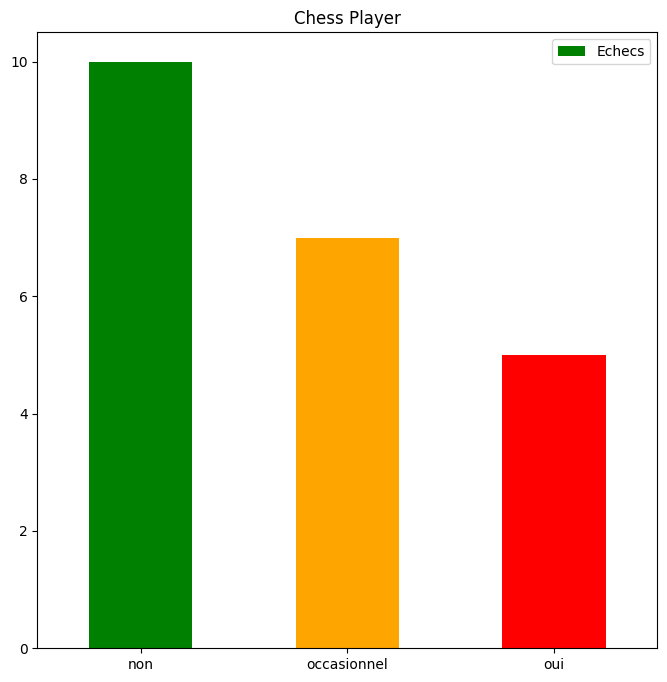

In [5]:
c = ['green', 'orange', 'red']
ax = data["Echecs"].value_counts().plot(kind = "bar", rot=0, figsize = (8, 8), color = c) # if Pie =>> autopct='%.1f%%')
ax.set_title("Chess Player",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()


[]

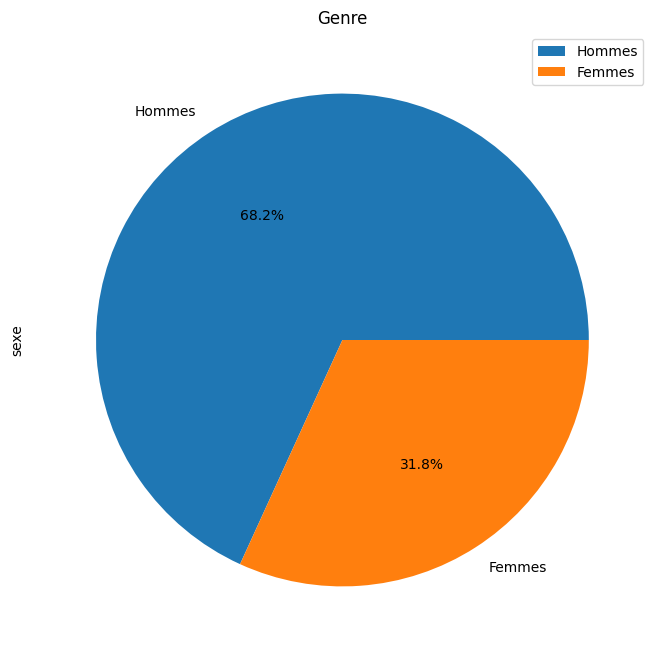

In [6]:

ax = data["sexe"].value_counts().plot(kind = "pie", figsize = (8, 8), autopct='%.1f%%' )
ax.set_title("Genre",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

In [7]:
data2 = data[["Fumeur", "sexe"]]
data3 = data2[data2['sexe'] == 'Hommes']
data3
data4 =data2[data2['sexe'] == 'Femmes']
data4
data4.groupby('Fumeur').count()
z = data3.groupby('Fumeur').count()#['sexe'].to_list()
z.reset_index()
data3['Fumeur'].unique()

array(['non', 'oui', 'occasionnel'], dtype=object)

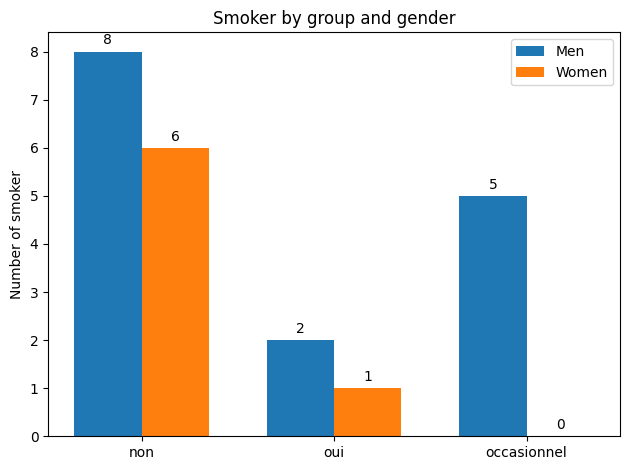

[0 1 2]


0     190.0
1     167.5
2     188.0
3     175.0
4     158.5
5     171.0
6     161.0
7     151.0
8     181.0
9     174.0
10    172.0
11    180.0
12    178.0
13    176.0
14    161.0
15    186.0
16    163.0
17    158.0
18    180.0
19    187.0
20    184.0
21    175.0
Name: Taille (cm), dtype: float64

In [8]:
#Créer un nouveau DataFrame avec les colonnes dont j'ai besoin:
data2 = data[["Fumeur", "sexe"]]
#Récupérer ma colonne avec les valeurs spécifique dont j'ai besoin:
data3 = data2[data2['sexe'] == 'Hommes'] 
data3
#Grouper mon Frame sur la colonne dont j'ai besoin pour faire mon count()
men = data3.groupby('Fumeur').count()
#Reset l'index pour mon graph
men = men.reset_index()
#Convertir en Liste
men = men['sexe'].to_list()
men

data4 =data2[data2['sexe'] == 'Femmes']
women = data4.groupby('Fumeur').count()
#Reset l'index avant d'ajouter une nouvelle colonne 
women = women.reset_index()
# Création de la nouvelle ligne et ajout de la colonne
new_row = ["occasionnel", 0]
women.loc[-1] = new_row
# Reset l'index avec un drop = True
women = women.reset_index(drop = True)
women = women['sexe'].to_list()
women


labels = data3['Fumeur'].unique()
men_means = men
women_means = women

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of smoker')
ax.set_title('Smoker by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

print(x)

data["Taille (cm)"][data["Taille (cm)"] < 230]

In [9]:
data3

,Fumeur,sexe
0,non,Hommes
2,oui,Hommes
3,non,Hommes
5,oui,Hommes
8,occasionnel,Hommes
9,occasionnel,Hommes
10,oui,Hommes
11,oui,Hommes
12,oui,Hommes
14,non,Hommes


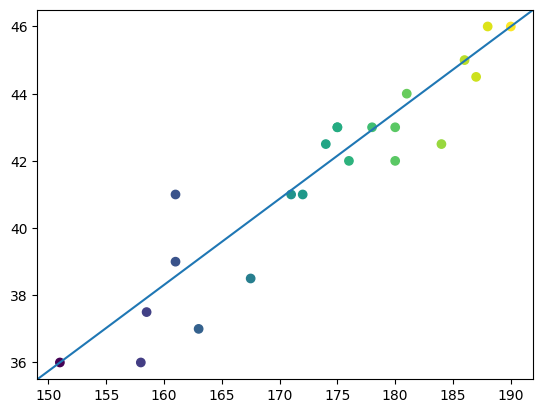

In [11]:
df1 = df[["Taille de pied", "Taille (cm)"]]
df1 = df1.dropna()
#df1 = df1.drop(16)
df1
x = df1["Taille (cm)"]
y = df1["Taille de pied"]

height = x
size = y

fig, ax = plt.subplots()
ax.scatter(height, size, c=height, marker="o")
ax.axline((min(x), min(y)), (max(x), max(y)))
plt.show()

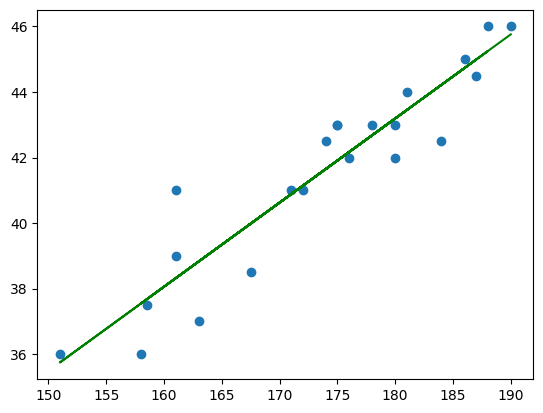

In [12]:
from scipy import stats

def predict(x):
   return slope * x + intercept

df2 = df[["Taille de pied", "Taille (cm)"]]
df2 = df2.dropna()
#df2 = df2.drop(16)
#selection de la première colonne de notre dataset (la taille de la population)
X = df2["Taille (cm)"]
#selection de deuxième colonnes de notre dataset (le profit effectué)
Y = df2["Taille de pied"]

fig, ax = plt.subplots()
#linregress() renvoie plusieurs variables de retour. On s'interessera 
# particulierement au slope et intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

# dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(X,Y, marker="o") # X et Y sont les variables qu'on a extraite dans le paragraphe précédent
#la variable fitLine sera un tableau de valeurs prédites depuis la tableau de variables X
fitLine = predict(X)
plt.plot(X, fitLine, c='g')
plt.show()


Récupérer le dataset de akinator.

- Tracer la taille des pieds (que l'on appelera y_mes) en fonction de la taille (que l'on appelera x).

- Ajouter la colonne y1 = a1 x + b1 avec a1 = 0.4 et b1 = -27

- Ajouter la colonne y2 = a2 x + b2 avec a2 = 0.9 et b2 = -120

- Tracer la droite y1 = a1 x + b2 avec a1 = 0.4 et b1 = -27

- Tracer la droite y2 = a1 x + b2 avec a2 = 0.9 et b2 = -120

- Calculer le R2 associé aux colonne y_mes et y1

- Calculer le R2 associé aux colonne y_mes et y2

- Lequel est le plus grand?

- Tracer la droite de régression linéaire grace à la fonction regplot de Seaborn

- Utiliser statsmodels.api pour déterminer les coefficient a et b de la fonction y = a x + b

https://www.statsmodels.org/stable/regression.html

Optionnel: Pour a compris entre [-1, 9] et b compris [0, 10], calculer R2

Tracer R2 sur un graphique en 3D en fonction de a et b

https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html
https://matplotlib.org/2.0.2/mpl_examples/mplot3d/surface3d_demo.py

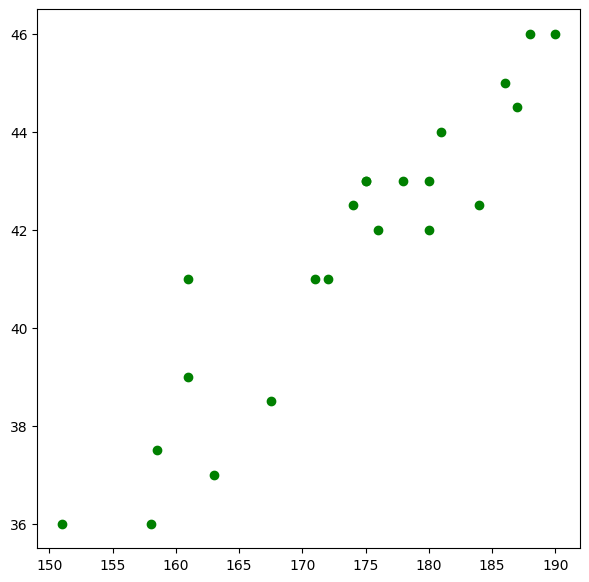

In [13]:
fig = plt.figure(figsize = (7, 7))
ax = plt.axes()
y_mes = df2["Taille de pied"]
x = df2["Taille (cm)"]
ax.scatter(x, y_mes, color = 'green');
df2["y1"] = df2["Taille (cm)"].apply(lambda y: 0.4*y + -27)
df2["y2"] = df2["Taille (cm)"].apply(lambda y: 0.9*y + -120)


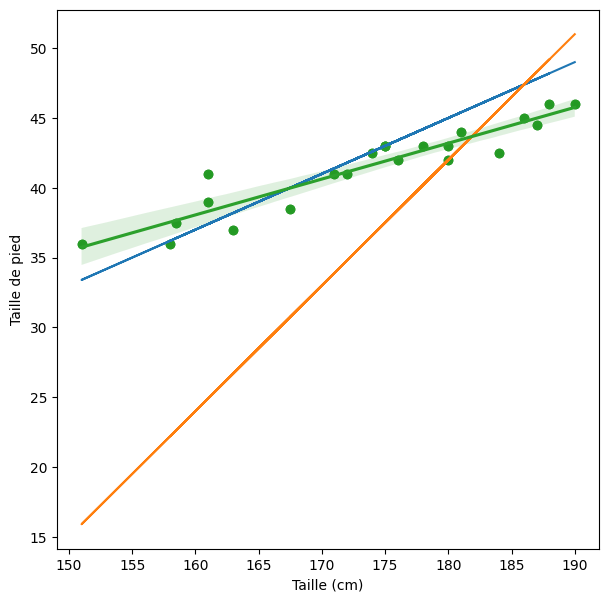

In [14]:
y1 = df2["y1"]
y2 = df2["y2"]
fig = plt.figure(figsize = (7, 7))
ax = plt.axes()

x = df2["Taille (cm)"]
ax.scatter(x, y_mes, color = 'green')
ax.plot(x,y1)
ax.plot(x, y2);
sns.regplot(x= x,y = y_mes, data = df2);

In [15]:
def calcul_r2(a, b):
    r = 1 - ((a - b)**2).sum() / ((a - a.mean())**2).sum()
    return r
r2_y1 = calcul_r2(y_mes, y1)
r2_y2 = calcul_r2(y_mes, y2)
print(r2_y1)
print(r2_y2)

0.5126369923745342
-7.9022947331087


In [16]:
y_mes

0     46.0
1     38.5
2     46.0
3     43.0
4     37.5
5     41.0
6     39.0
7     36.0
8     44.0
9     42.5
10    41.0
11    43.0
12    43.0
13    42.0
14    41.0
15    45.0
16    37.0
17    36.0
18    42.0
19    44.5
20    42.5
21    43.0
Name: Taille de pied, dtype: float64

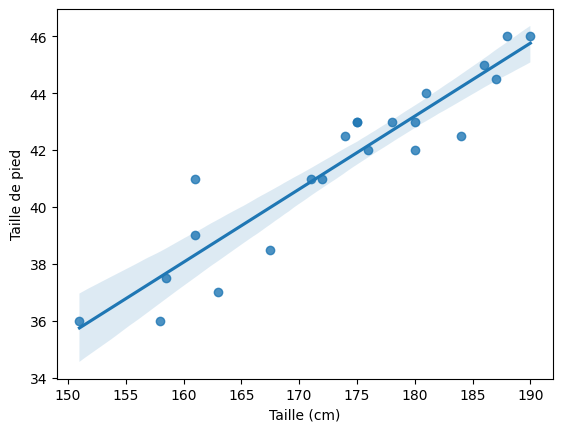

In [17]:
sns.regplot(x = x, y = y_mes, data = df2);

In [18]:
from sklearn.metrics import r2_score
r2_score(df2['Taille de pied'], df2['y2'])

-7.9022947331087

- Tracer la droite de régression linéaire grace à la fonction regplot de Seaborn

- Utiliser statsmodels.api pour déterminer les coefficient a et b de la fonction y = a x + b

https://www.statsmodels.org/stable/regression.html

Optionnel: Pour a compris entre [-1, 9] et b compris [0, 10], calculer R2

Tracer R2 sur un graphique en 3D en fonction de a et b

https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html https://matplotlib.org/2.0.2/mpl_examples/mplot3d/surface3d_demo.py

In [19]:
X = sm.add_constant(df2['Taille (cm)'])
model = sm.OLS(y_mes, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Taille de pied   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     136.2
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           2.23e-10
Time:                        22:18:34   Log-Likelihood:                -32.455
No. Observations:                  22   AIC:                             68.91
Df Residuals:                      20   BIC:                             71.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.0296      3.825     -0.792      

In [20]:
Y = df2['Taille de pied']
X = sm.add_constant(df2['Taille (cm)'])
model = sm.OLS(Y,X)
results = model.fit()
results.params

const         -3.029643
Taille (cm)    0.256786
dtype: float64